[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, ''),
 Text(70.0, 0, ''),
 Text(80.0, 0, '')]

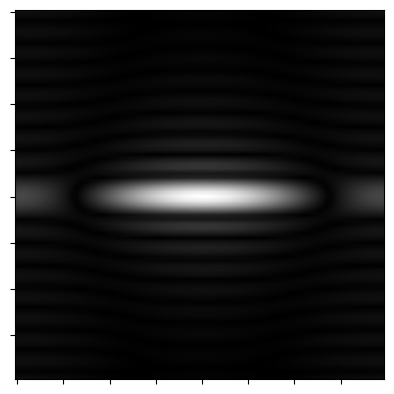

In [1]:
# FAR-FIELD FRAUNHOFER DIFFRACTION PATTERN OF A COMPLEX APERTURE


import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d 

N = 80 #number of grid points
M = 80 #number of grid points
r = 9 #radius of circular aperture
l = 3 #width of stripe

f = np.zeros((N,M)) #initialize 2d array
m = int((N+1)/2) #define center

#populate f with points within the aperture
for i in range(N):
    for j in range(M):
        #check if (i,j) is within the complex aperture including circle and stripe
        if np.sqrt((i**2)+(j**2))<= r and np.abs(j) <= l / 2: 
            f[i+m,j+m] = (-1)**(i+j+(2*m)) 
            f[m-i,m-j] = (-1)**((2*m)-i-j)
            f[m-i,m+j] = (-1)**((2*m)-i+j)
            f[m+i,m-j] = (-1)**((2*m)+i-j)

#initialize array for fourier transform
dft = np.zeros((N,M),complex)

#perform the fourier transform on f and store in dft
for u in range(N):
    for v in range(M):
        add = 0 
        for x in range(N):
            for y in range(M):
                add += f[x,y]*np.exp(-2j*np.pi*((u*x/M) + (v*y/N)))
                dft[u,v] = add 

#plot the far-field fraunhofer diffraction pattern
fig, ax = plt.subplots()
im = ax.imshow(np.abs(dft), cmap=matplotlib.cm.gray, vmin=abs(dft).min(), vmax=abs(dft).max())
im.set_interpolation('bilinear')
ax.set_yticklabels([])
ax.set_xticklabels([])